Scraping Data from a Website

In [5]:
from bs4 import BeautifulSoup
import requests

In [6]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

In [7]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-

In [8]:
table = soup.find_all('table')[0]

In [9]:
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [10]:
world_title = table.find_all('th')

In [11]:
world_title

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [12]:
world_table_title = [title.text.strip() for title in world_title]

In [13]:
world_table_title

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [14]:
import pandas as pd

In [15]:
df= pd.DataFrame(columns =world_table_title)

In [16]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [17]:
column_data = table.find_all('tr')

In [18]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_data = [data.text.strip() for data in row_data]

    length = len(df)
    df.loc[length] = individual_data

In [19]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [20]:
df.to_csv(r'C:\Users\USER\OneDrive\Documents\Data Analysis Projects\Webscraping with Python\Ranking.csv', index = False)

In [138]:
df = pd.read_csv(r'C:\Users\USER\OneDrive\Documents\Data Analysis Projects\Webscraping with Python\Ranking.csv')

In [140]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,648125,6.0%,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574785,11.9%,1525000,"Seattle, Washington"
2,3,Apple,Electronics industry,383482,-2.8%,161000,"Cupertino, California"
3,4,UnitedHealth Group,Healthcare,371622,14.6%,440000,"Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,364482,20.7%,396500,"Omaha, Nebraska"


In [142]:
df.isnull().sum()

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64

In [144]:
df.dtypes

Rank                       int64
Name                      object
Industry                  object
Revenue (USD millions)     int64
Revenue growth            object
Employees                  int64
Headquarters              object
dtype: object

Cleaning the Scrapped Data

In [151]:
df.dtypes

Rank                       int64
Name                      object
Industry                  object
Revenue (USD millions)     int64
Revenue growth            object
Employees                  int64
Headquarters              object
dtype: object

In [153]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,648125,6.0%,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574785,11.9%,1525000,"Seattle, Washington"
2,3,Apple,Electronics industry,383482,-2.8%,161000,"Cupertino, California"
3,4,UnitedHealth Group,Healthcare,371622,14.6%,440000,"Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,364482,20.7%,396500,"Omaha, Nebraska"


In [155]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,648125,6.0%,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574785,11.9%,1525000,"Seattle, Washington"
2,3,Apple,Electronics industry,383482,-2.8%,161000,"Cupertino, California"
3,4,UnitedHealth Group,Healthcare,371622,14.6%,440000,"Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,364482,20.7%,396500,"Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,45735,11.8%,16023,"New York City, New York"
96,97,CHS,Agriculture cooperative,45590,-4.6%,10609,"Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,45006,-2.5%,34100,"New York City, New York"
98,99,Dow Chemical Company,Chemical industry,44622,-21.6%,35900,"Midland, Michigan"


In [157]:
df.to_csv(r'C:\Users\USER\OneDrive\Documents\Data Analysis Projects\Webscraping with Python\Ranking.csv', index = False)

Data Visualizing

In [160]:
import matplotlib.pyplot as plt

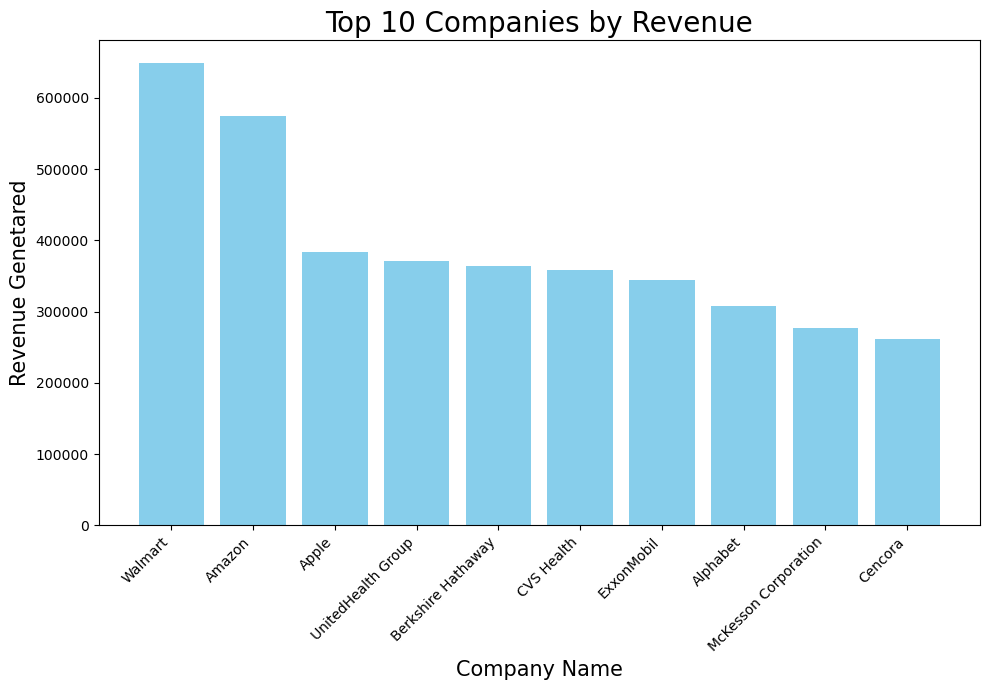

In [162]:
top10 = df.head(10)

plt.figure(figsize=(10,7))
plt.bar(top10['Name'], top10['Revenue (USD millions)'], color = 'skyblue')

plt.xlabel('Company Name', fontsize = 15)
plt.ylabel('Revenue Genetared', fontsize = 15)
plt.title('Top 10 Companies by Revenue', fontsize = 20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

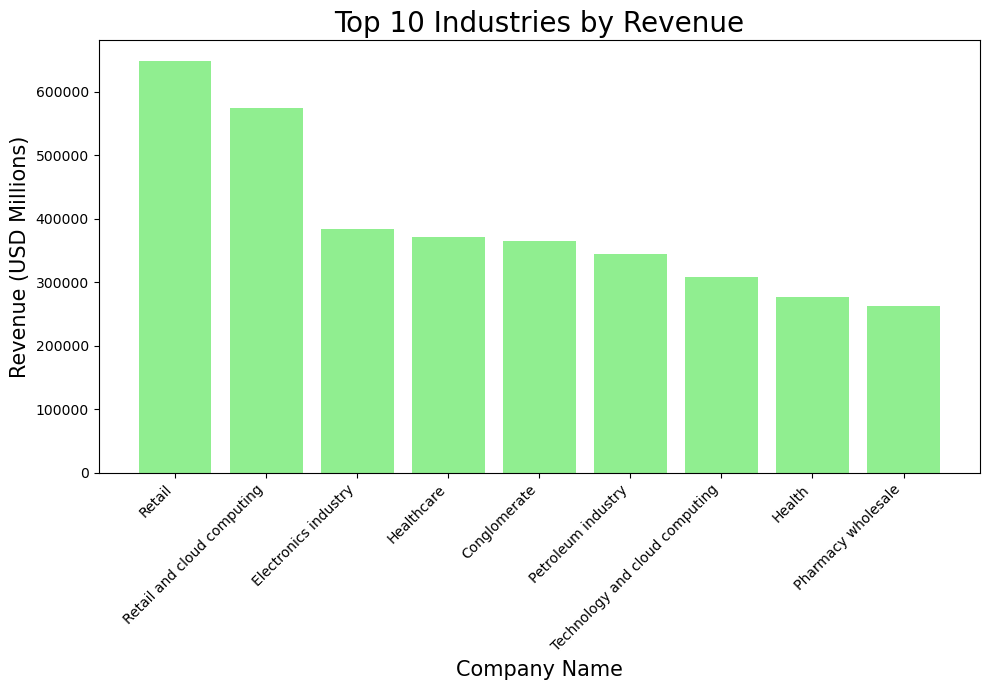

In [164]:
top10 = df.head(10)

plt.figure(figsize=(10,7))
plt.bar(top10['Industry'], top10['Revenue (USD millions)'], color = 'lightgreen')

plt.xlabel('Company Name', fontsize = 15)
plt.ylabel('Revenue (USD Millions)', fontsize = 15)
plt.title('Top 10 Industries by Revenue', fontsize = 20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [168]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,648125,6.0,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574785,11.9,1525000,"Seattle, Washington"
2,3,Apple,Electronics industry,383482,-2.8,161000,"Cupertino, California"
3,4,UnitedHealth Group,Healthcare,371622,14.6,440000,"Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,364482,20.7,396500,"Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,45735,11.8,16023,"New York City, New York"
96,97,CHS,Agriculture cooperative,45590,-4.6,10609,"Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,45006,-2.5,34100,"New York City, New York"
98,99,Dow Chemical Company,Chemical industry,44622,-21.6,35900,"Midland, Michigan"


ValueError: Wedge sizes 'x' must be non negative values

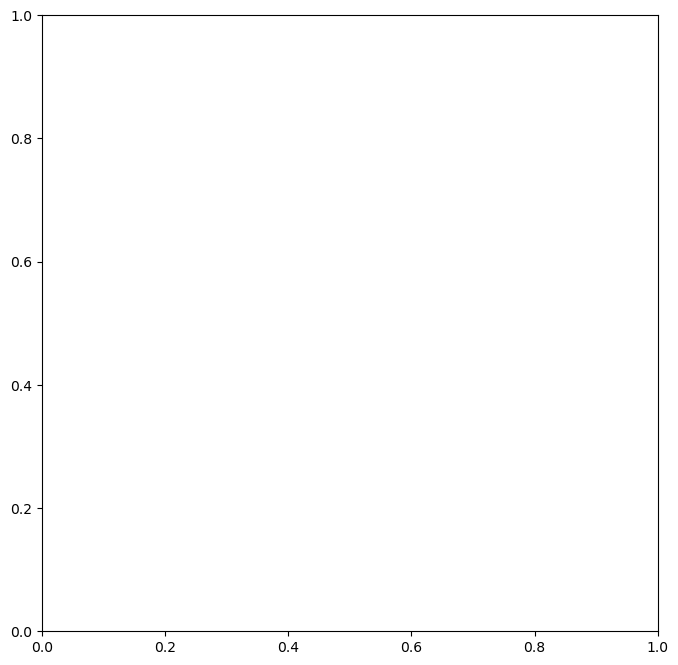

In [166]:
df['Revenue growth'] = pd.to_numeric(df['Revenue growth'].str.rstrip('%'), errors='coerce')

#Filter the first 5 rows and group by Industry
filtered_data = df.head(5)
if not filtered_data.empty and 'Industry' in filtered_data.columns and 'Revenue growth' in filtered_data.columns:
    industry_revenue = filtered_data.groupby('Industry')['Revenue growth'].sum()

# Plot a pie chart  
plt.figure(figsize=(10, 8))
plt.pie(
    industry_revenue, 
    labels=industry_revenue.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab20.colors
)

# Add a title
plt.title('Revenue Distribution by Industry', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()


In [134]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,648125,nan,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574785,nan,1525000,"Seattle, Washington"
2,3,Apple,Electronics industry,383482,nan,161000,"Cupertino, California"
3,4,UnitedHealth Group,Healthcare,371622,nan,440000,"Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,364482,nan,396500,"Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,45735,nan,16023,"New York City, New York"
96,97,CHS,Agriculture cooperative,45590,nan,10609,"Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,45006,nan,34100,"New York City, New York"
98,99,Dow Chemical Company,Chemical industry,44622,nan,35900,"Midland, Michigan"


In [126]:
# Ensure the Revenue growth column is numeric
df['Revenue growth'] = pd.to_numeric(df['Revenue growth'].str.rstrip('%'), errors='coerce')

# Filter the first 5 rows and group by Industry
filtered_data = df.head(5)
if not filtered_data.empty and 'Industry' in filtered_data.columns and 'Revenue growth' in filtered_data.columns:
    industry_revenue = filtered_data.groupby('Industry')['Revenue growth'].sum()

    # Check if the result is not empty
    if not industry_revenue.empty:
        # Plot the pie chart
        plt.figure(figsize=(10, 8))
        plt.pie(
            industry_revenue,
            labels=industry_revenue.index,
            autopct='%1.1f%%',
            startangle=140,
            colors=plt.cm.tab20.colors
        )

        # Add a title
        plt.title('Revenue Growth Distribution by Industry (Top 5 Rows)', fontsize=14)
        plt.tight_layout()

        # Show the plot
        plt.show()
    else:
        print("The grouped data is empty. Check if the 'Industry' column has valid data in the top 5 rows.")
else:
    print("The filtered data is empty or missing required columns.")


AttributeError: Can only use .str accessor with string values!